In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Bayesian Change Point Model Implementation

The relation of important event to Brent oil prices, 

#### Data:
    - Date 
    - Price 



In [14]:
import os

# Get current working directory
cwd = os.getcwd()
print("📁 Current working directory:", cwd)

# Construct path relative to notebook location
file_path = os.path.join(cwd, "data", "raw", "BrentOilPrices.csv")

try:
    df = pd.read_csv(file_path, parse_dates=['Date'])
    print("✅ Data loaded successfully. Shape:", df.shape)
except FileNotFoundError:
    print(f"❌ File not found at: {file_path}")
    print("🔍 Tip: Check if you're running the notebook from the project root.")
except pd.errors.ParserError as e:
    print("❌ Parsing error:", e)
except Exception as e:
    print("❌ Unexpected error:", e)

📁 Current working directory: D:\CodeFiles\Kifiya\week10\brent-change-point-analysis


C:\Users\herko\AppData\Local\Temp\ipykernel_2940\11070155.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=['Date'])


✅ Data loaded successfully. Shape: (9011, 2)


In [15]:
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [16]:
price = df['Price'].values
date = df['Date'].values

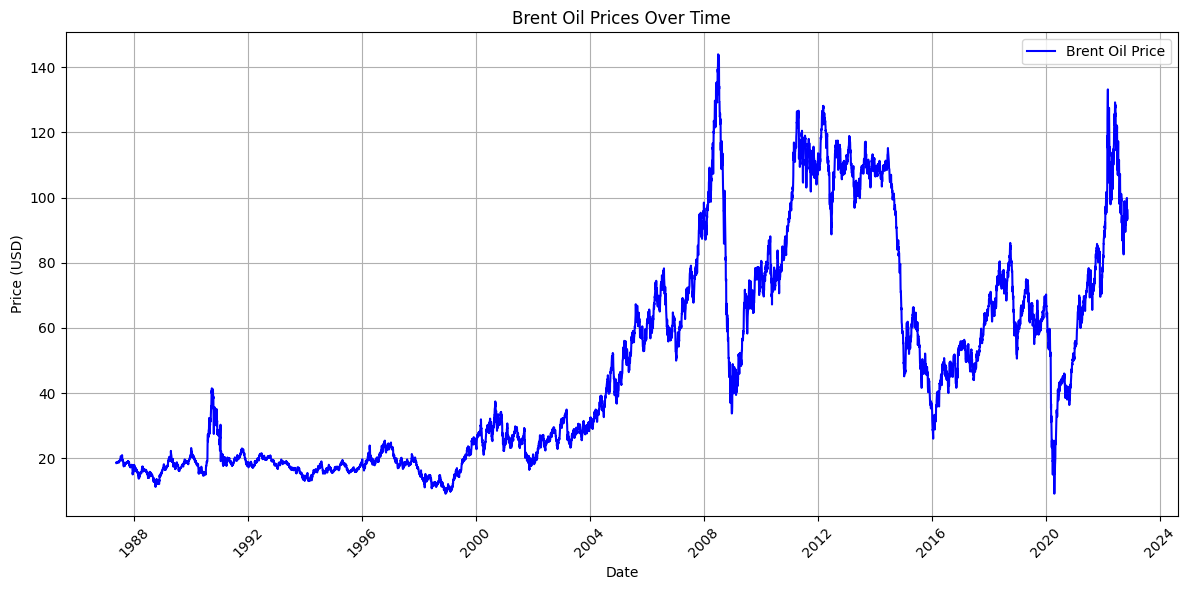

In [17]:
# plot raw prices
plt.figure(figsize=(12, 6))
plt.plot(date, price, label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
# Check stationarity (ADF test)
def test_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]:.2f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for k, v in result[4].items():
        print(f'   {k}: {v:.2f}')

test_stationarity(df['Price'])  # Expected: Non-stationary (p > 0.05)
test_stationarity(np.log(df['Price']).diff().dropna())  # Log-returns (should be stationary)

ADF Statistic: -1.99
p-value: 0.2893
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57
ADF Statistic: -16.43
p-value: 0.0000
Critical Values:
   1%: -3.43
   5%: -2.86
   10%: -2.57


In [ ]:
# time series visualization
plt.figure(figsize=(12, 6))
plt.plot(['Date'], ['Price'], data=df, label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(true)
plt.legend()
plt.show()